In [15]:
import math,io,sys
import umap
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
from itertools import combinations, product, permutations
from scipy import signal, fftpack
from scipy.stats import cumfreq
%matplotlib inline
from itertools import product, islice
import multiprocess as multiprocessing

RHO_CUTOFF = 0.4

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [16,16]

np.set_printoptions(threshold=sys.maxsize)

In [16]:
def strip_trailing_nans(arr):
    index_of_first_nonnan = np.where(~np.isnan(arr[::-1]))[0]
    if len(index_of_first_nonnan) == 0:
        return np.array([]), arr
    
    n_trailing_nans = index_of_first_nonnan[0]
    nan_array = arr[-n_trailing_nans:]
    stripped_array = arr[:-n_trailing_nans] if n_trailing_nans != 0 else arr
    return stripped_array, nan_array

def start_of_nan_blocks(arr):
    isnan_array = np.isnan(arr)
    starts = np.where((isnan_array[:-1] == False) & (isnan_array[1:] == True))[0] + 1
    
    if isnan_array[0]:
        starts = np.insert(starts, 0, 0)
    
    return starts

def maximize_correlation(temp_arr, nan_arr, nan_blocks, mean_rho):
    best_arr = None
    best_correlation = -np.inf
    
    # Number of places to insert the NaNs
    num_places = len(nan_arr)

    # Add the position after the last element to nan_blocks
    nan_blocks = np.append(nan_blocks, len(temp_arr))

    # For each possible way to insert the NaNs
    for places in product(nan_blocks, repeat=num_places):
        modified_arr = temp_arr.copy()
        adjust = 0
        
        for p in sorted(places):
            modified_arr = np.insert(modified_arr, p + adjust, np.nan)
            adjust += 1
        
        valid_indices = ~np.isnan(modified_arr) * ~np.isnan(mean_rho)
        
        # Ensure the lengths match before calculating correlation
        if len(modified_arr) == len(mean_rho):
            # Calculate the correlation between the modified temp_arr and mean_rho
            correlation = np.corrcoef(modified_arr[valid_indices], mean_rho[valid_indices])[0, 1]

            if correlation > best_correlation:
                best_correlation = correlation
                best_arr = modified_arr

    return best_arr


def increase_correlation_slow(mean_ed, mean_rho):
    temp_arr, nan_arr = strip_trailing_nans(mean_ed)
    nan_blocks = start_of_nan_blocks(temp_arr)

    if len(nan_blocks) > 5:
        return mean_ed

    result = maximize_correlation(temp_arr, nan_arr, nan_blocks, mean_rho)
    return result

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


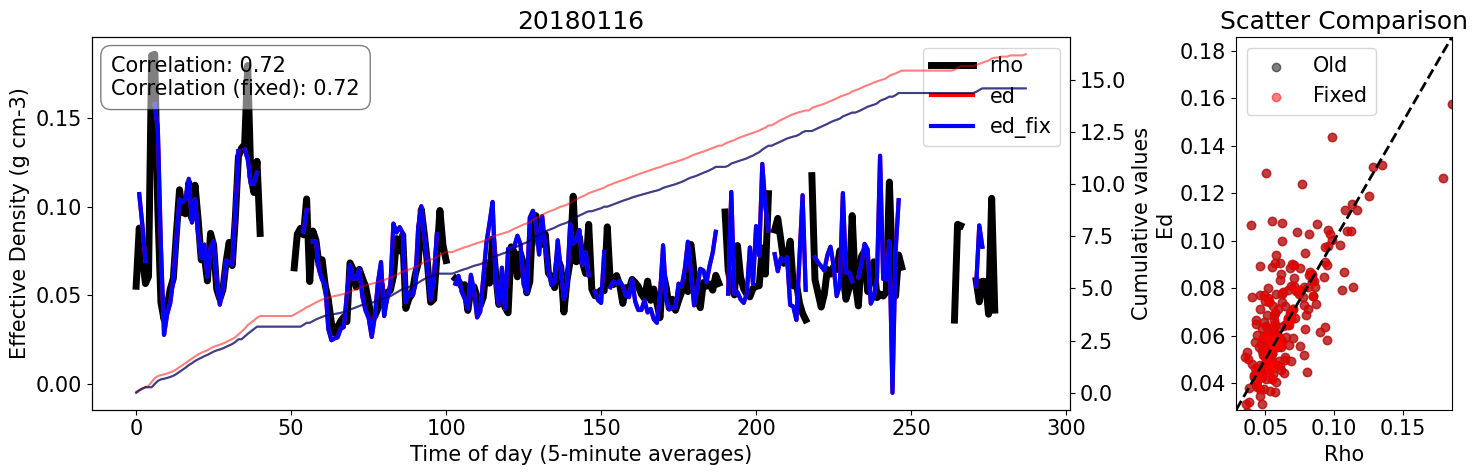

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


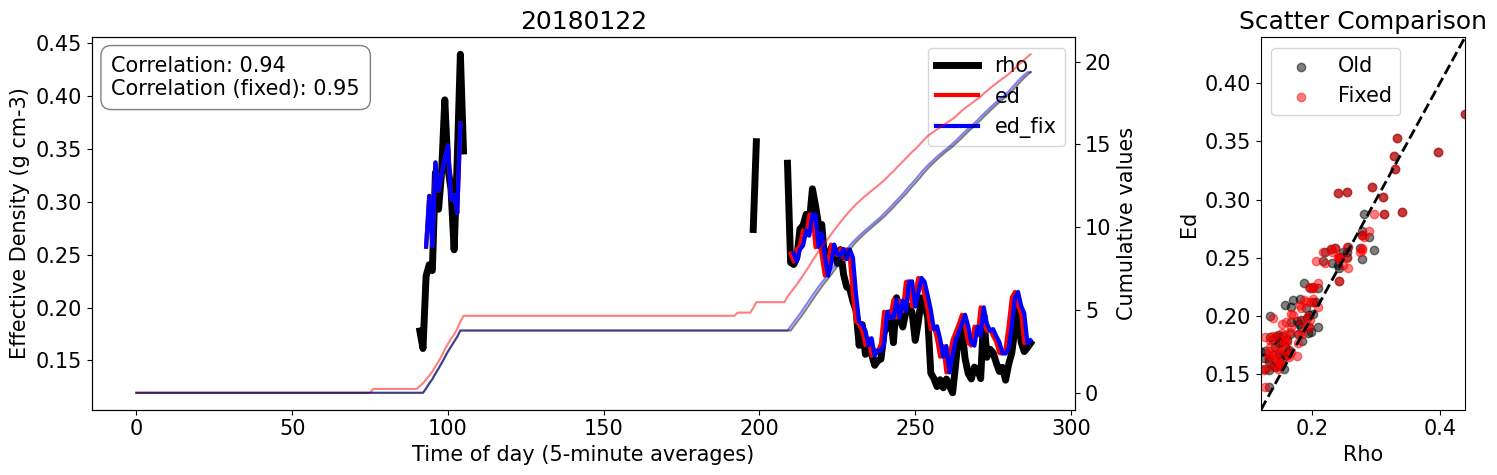

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


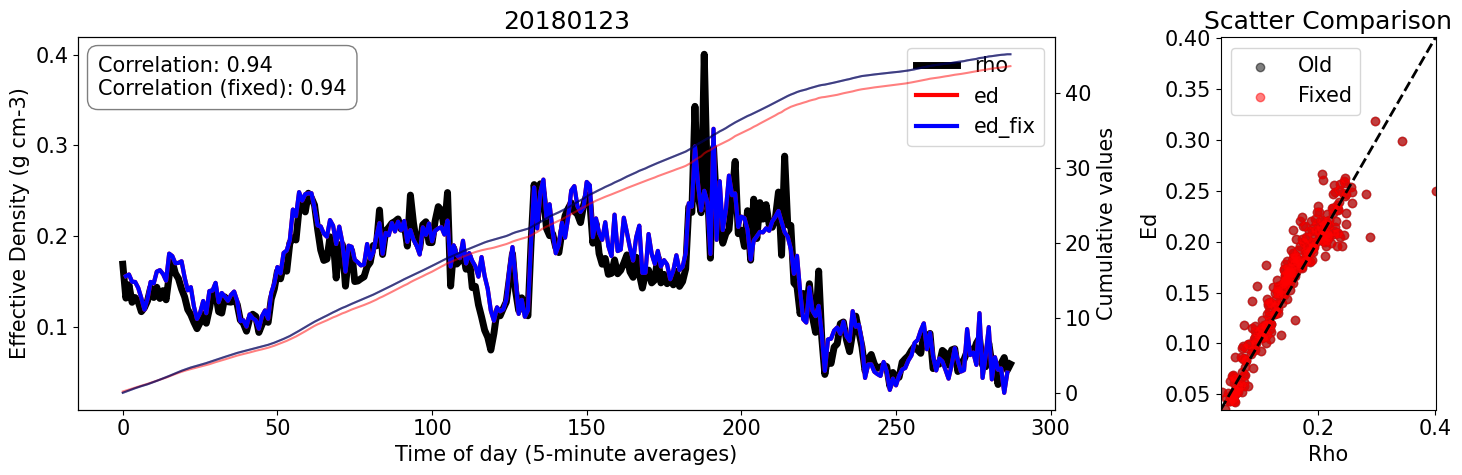

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


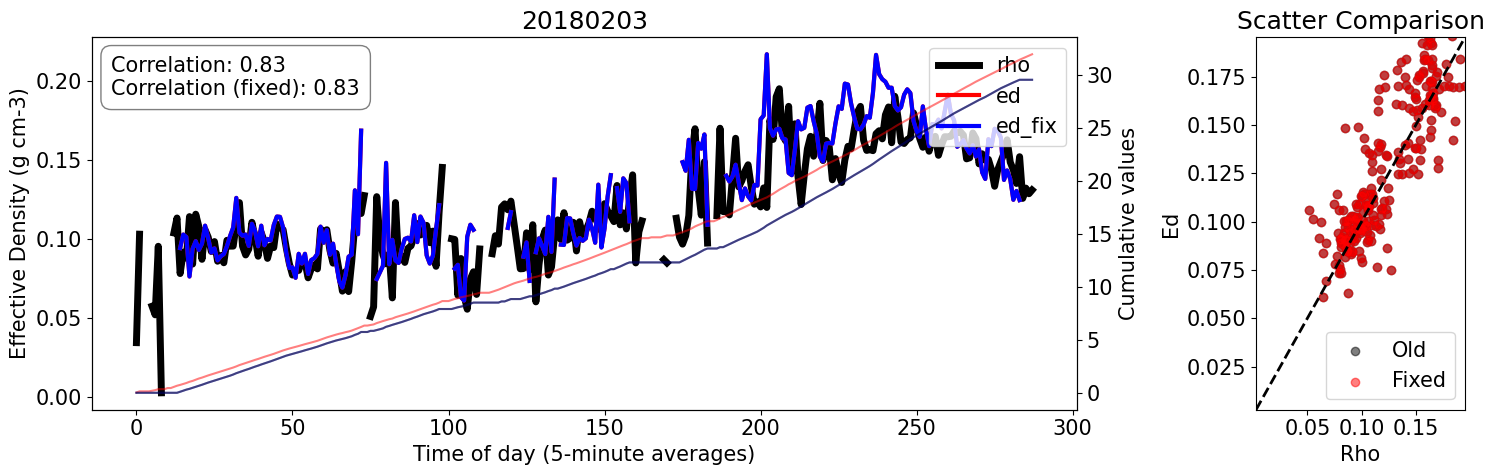

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


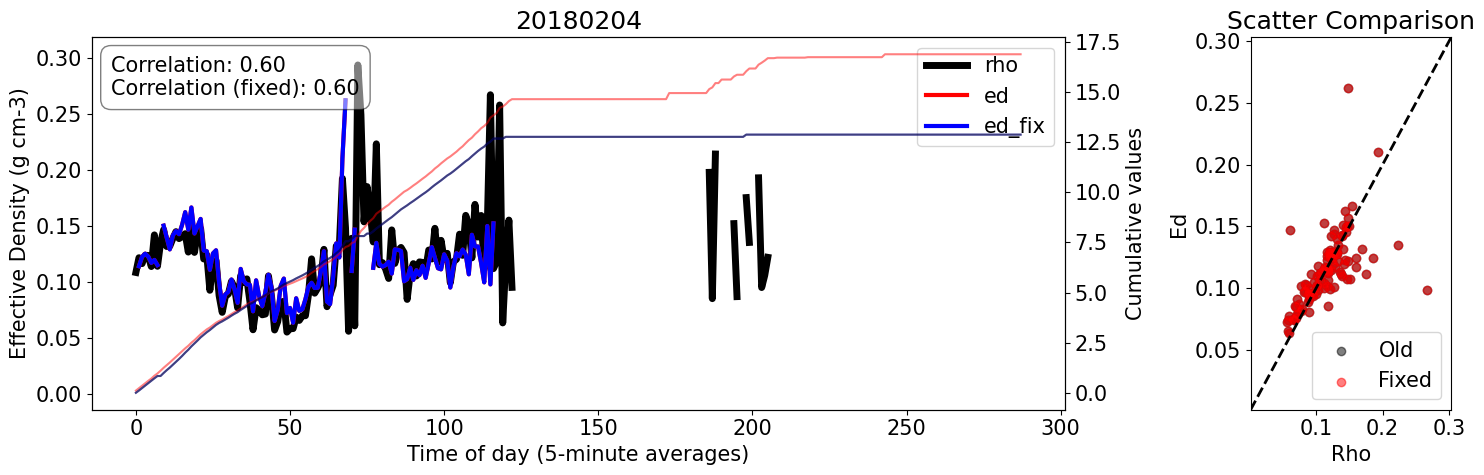

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


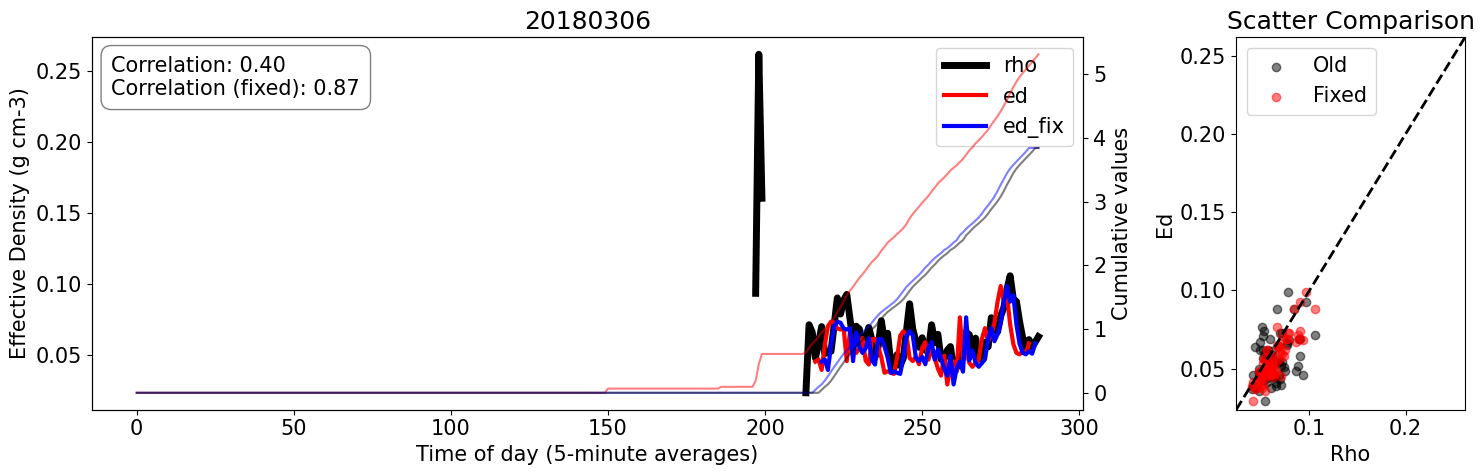

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


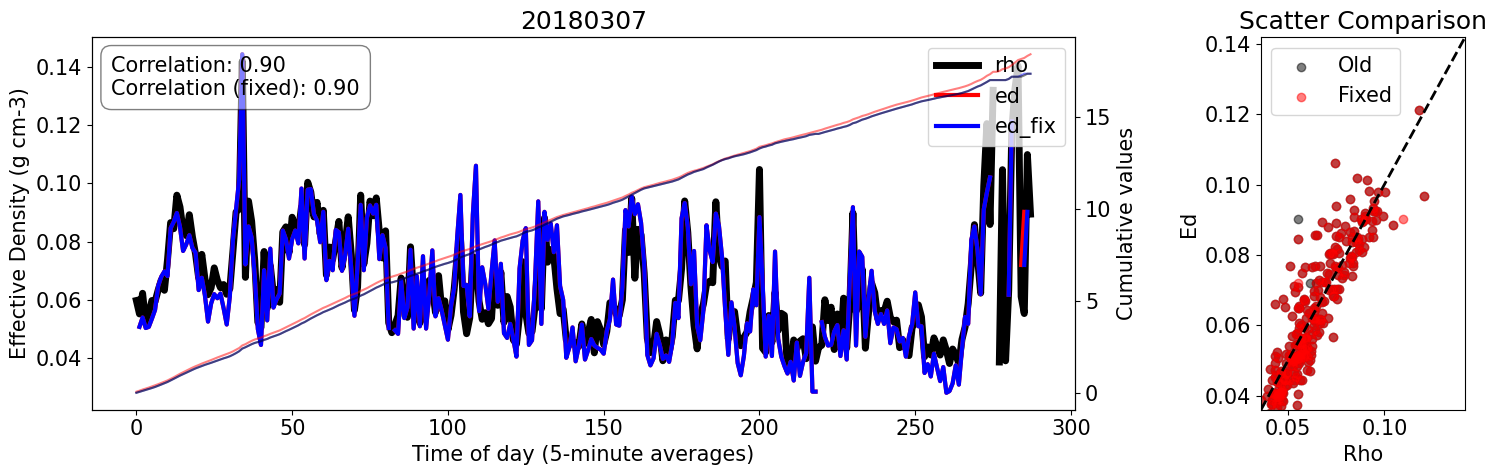

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


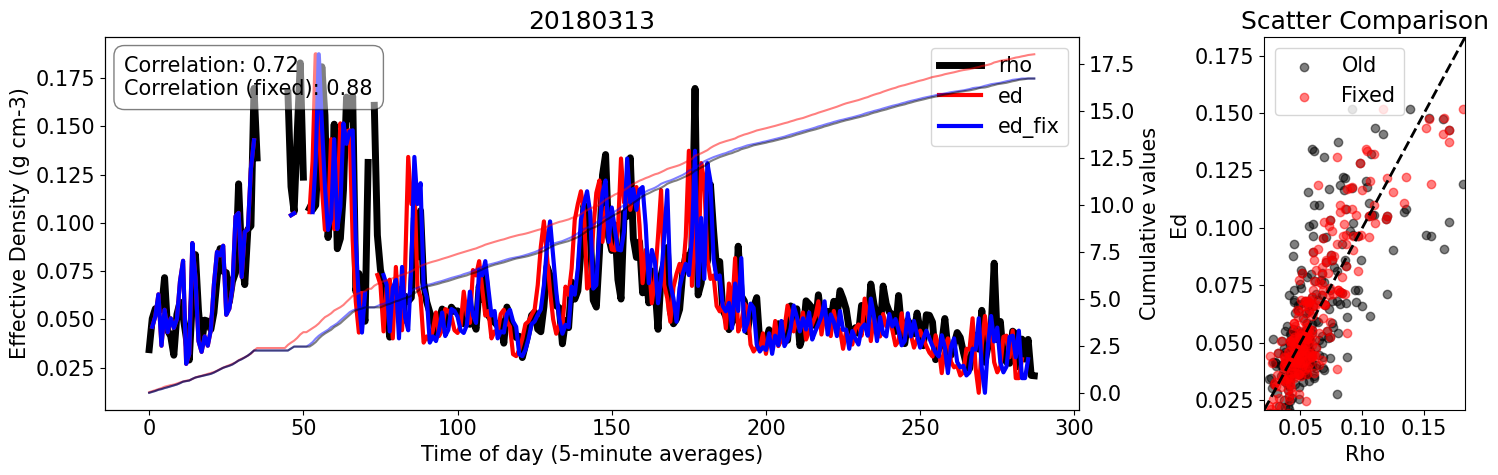

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_4787/2106032001.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true

In [24]:



def check_ed_v_rho(date):
    rho_path = '/Users/fraserking/Development/pip_processing/ed_timing/edensity_distributions/006' + date + '2350_01_rho_Plots_D_minute.nc'
    ed_path = '/Users/fraserking/Development/pip_processing/ed_timing/edensity_lwe_rate/006' + date + '2350_01_P_Minute.nc'
    rho_ds = xr.open_dataset(rho_path)
    ed_ds = xr.open_dataset(ed_path)

    non_zeros_rho = rho_ds['rho'].where(rho_ds['rho'] != 0)
    resampled_rho = non_zeros_rho.resample(time='5T').mean('time', skipna=True).values
    mean_rho = np.nanmean(resampled_rho, axis=1)

    reshaped_data = ed_ds['ed'].values.reshape(-1, 5)
    mean_ed = reshaped_data.mean(axis=1)

    # print(mean_rho)
    # print()
    # print(mean_ed)
    # print('done')

    new_mean_ed = increase_correlation_slow(mean_ed, mean_rho)
    # new_mean_ed = mean_ed


    # Compute statistics
    mask = ~np.isnan(mean_rho) & ~np.isnan(mean_ed)
    correlation, _ = pearsonr(mean_rho[mask], mean_ed[mask])
    
    mask2 = ~np.isnan(mean_rho) & ~np.isnan(new_mean_ed)
    correlation2, _ = pearsonr(mean_rho[mask2], new_mean_ed[mask2])

    # Setup the figure with gridspec
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 4)
    ax1 = fig.add_subplot(gs[0, :3])
    ax2 = fig.add_subplot(gs[0, 3])

    # Left plot
    # ax1.grid()
    ax1.plot(np.arange(len(mean_rho)), mean_rho, color='black', linewidth=5, label='rho')
    ax1.plot(np.arange(len(mean_ed)), mean_ed, color='red', linewidth=3, label='ed')
    ax1.plot(np.arange(len(new_mean_ed)), new_mean_ed, color='blue', linewidth=3, label='ed_fix')
    
    # Creating twin axis for cumulative values
    ax1b = ax1.twinx()
    ax1b.plot(np.arange(len(mean_rho)), np.nancumsum(mean_rho), color='red', alpha=0.5, label='Cumulative rho')
    ax1b.plot(np.arange(len(mean_ed)), np.nancumsum(mean_ed), color='blue', alpha=0.5, label='Cumulative ed')
    ax1b.plot(np.arange(len(new_mean_ed)), np.nancumsum(new_mean_ed), color='black', alpha=0.5, label='Cumulative fixed_ed')
    ax1b.set_ylabel('Cumulative values')
    
    # Annotating with stats
    stats_text = f"Correlation: {correlation:.2f}\nCorrelation (fixed): {correlation2:.2f}"
    ax1.text(0.02, 0.95, stats_text, transform=ax1.transAxes, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
    ax1.set_xlabel('Time of day (5-minute averages)')
    ax1.set_ylabel('Effective Density (g cm-3)')
    ax1.set_title(date)
    ax1.legend(loc='upper right')
    # ax1b.legend(loc='upper right')

    max_val = np.nanmax(mean_rho)
    min_val = np.nanmin(mean_rho)
    # Right plot (scatter plot)
    ax2.scatter(mean_rho, mean_ed, color='black', alpha=0.5, label="Old")
    ax2.scatter(mean_rho, new_mean_ed, color='red', alpha=0.5, label="Fixed")
    ax2.set_xlim((min_val, max_val))
    ax2.set_ylim((min_val, max_val))
    ax2.plot([min_val, max_val], [min_val, max_val], linewidth=2, color='black', linestyle='--')
    ax2.legend()
    ax2.set_xlabel('Rho')
    ax2.set_ylabel('Ed')
    ax2.set_title('Scatter Comparison')

    plt.tight_layout()
    plt.show()


# check_ed_v_rho('20171111')
# check_ed_v_rho('20171211')
# check_ed_v_rho('20171213')
# check_ed_v_rho('20180104')
# check_ed_v_rho('20180105')
# check_ed_v_rho('20180106')
# check_ed_v_rho('20180115')
# check_ed_v_rho('20180116')
# check_ed_v_rho('20180122')
# check_ed_v_rho('20180123')
# check_ed_v_rho('20180203')
# check_ed_v_rho('20180204')
# check_ed_v_rho('20180306')
# check_ed_v_rho('20180307')
check_ed_v_rho('20180313')
# check_ed_v_rho('20180412')
# check_ed_v_rho('20181117')
# check_ed_v_rho('20181119')
# check_ed_v_rho('20181120')
# check_ed_v_rho('20181125')
# check_ed_v_rho('20181126')
# check_ed_v_rho('20181202')
# check_ed_v_rho('20181203')
# check_ed_v_rho('20190107')
# check_ed_v_rho('20190120')
# check_ed_v_rho('20190121')
